# Decision Trees - Theory and Practical Examples

# 1. What is a Decision Tree, and how does it work

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It models data using a tree-like structure, where:

Each internal node represents a decision rule based on a feature.
Each branch represents the outcome of the decision.
Each leaf node represents a final prediction (class label or continuous value).

## How Does a Decision Tree Work?
Select the Best Feature

The algorithm starts at the root node and selects the best feature to split the data based on impurity measures like Gini Impurity or Entropy.
Recursive Splitting

The dataset is divided into subsets based on the selected feature's value, forming child nodes.
This process continues recursively until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf).
Stopping Criteria

### The tree stops growing when:
All data points in a node belong to the same class (pure node).
A predefined depth limit is reached.
The number of samples in a node is too small to split further.
Prediction

To classify a new instance, start at the root and follow the decision rules down the tree until reaching a leaf node.

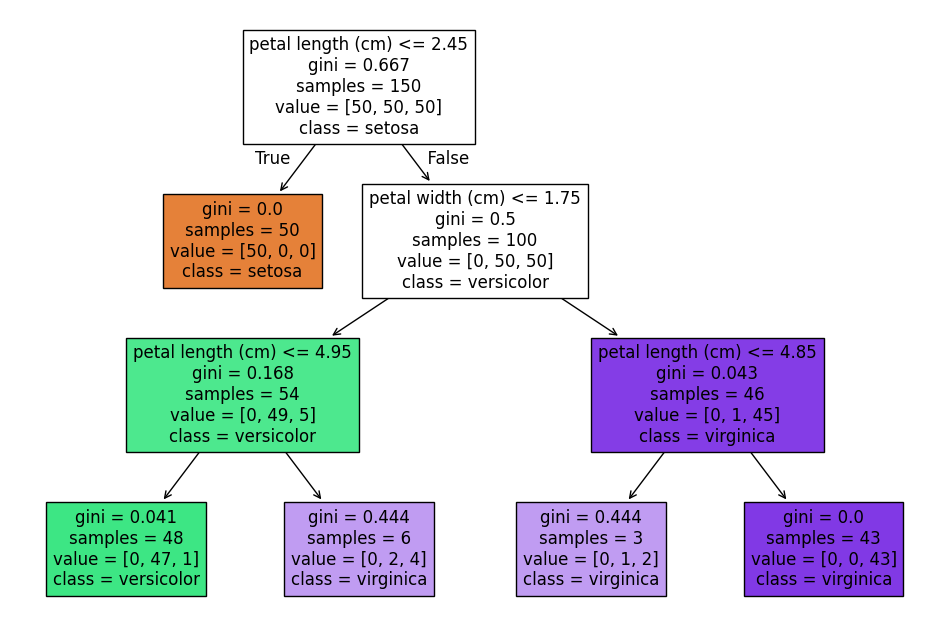

In [1]:
# Example Implementation in Python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

## 2 What are impurity measures in Decision Trees

Impurity measures determine the quality of a split in a Decision Tree. The two main measures are:
- **Gini Impurity**
- **Entropy**

## Gini Impurity Formula

In [2]:

from sympy import symbols, Sum
p = symbols('p')
gini_impurity = 1 - Sum(p**2, (p, 0, 1))
gini_impurity

1 - Sum(p**2, (p, 0, 1))

## Entropy Formula

In [3]:
from sympy import log
entropy = -Sum(p * log(p, 2), (p, 0, 1))
entropy

-Sum(p*log(p)/log(2), (p, 0, 1))

In [4]:
# Here’s how you could calculate the impurity measures (Gini Impurity, Entropy, and Classification Error)

import numpy as np

# Sample dataset: A set of class labels in a node
class_labels = ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'A', 'B']

# Function to calculate Gini Impurity
def gini_impurity(labels):
    class_probs = [labels.count(cls) / len(labels) for cls in set(labels)]
    return 1 - sum([p**2 for p in class_probs])

# Function to calculate Entropy
def entropy(labels):
    class_probs = [labels.count(cls) / len(labels) for cls in set(labels)]
    return -sum([p * np.log2(p) for p in class_probs if p > 0])

# Function to calculate Classification Error
def classification_error(labels):
    class_probs = [labels.count(cls) / len(labels) for cls in set(labels)]
    return 1 - max(class_probs)

# Calculate the impurity measures for the sample dataset
gini = gini_impurity(class_labels)
ent = entropy(class_labels)
error = classification_error(class_labels)

# Print the results
print(f"Gini Impurity: {gini:.4f}")
print(f"Entropy: {ent:.4f}")
print(f"Classification Error: {error:.4f}")


Gini Impurity: 0.6600
Entropy: 1.5710
Classification Error: 0.6000


## Information Gain

Information Gain measures the reduction in impurity after a split:
$$IG = I(parent) - (weighted\ sum\ of\ child\ impurities)$$

## Pre-Pruning vs. Post-Pruning

Pre-Pruning stops tree growth early (e.g., max depth, min samples split), while Post-Pruning removes nodes after the tree is fully grown to prevent overfitting.

## Decision Tree Regressor

A Decision Tree Regressor predicts continuous values by splitting the data based on feature values, similar to a classification tree.

## Advantages and Disadvantages of Decision Trees

**Advantages:**
- Easy to interpret
- Handles both numerical and categorical data

**Disadvantages:**
- Prone to overfitting
- Sensitive to noisy data

# 1. What is a Decision Tree, and how does it work?


A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It splits data into smaller subsets based on feature values, forming a tree-like structure where:

Internal nodes represent decision points based on a feature.
Branches represent different possible outcomes.
Leaf nodes represent final predictions (class labels or numerical values).
The tree is built using a recursive splitting process, aiming to minimize impurity and maximize homogeneity in the child nodes.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import math

# 1. What is a Decision Tree?
# Decision Tree is a supervised learning algorithm used for classification and regression.

# 2. Impurity Measures: Gini Impurity and Entropy

def gini_impurity(p):
    return 1 - sum([pi**2 for pi in p])

def entropy(p):
    return -sum([pi * math.log2(pi) for pi in p if pi > 0])

# Example Calculation
gini_example = gini_impurity([0.5, 0.5])  # Two classes, equally distributed
entropy_example = entropy([0.5, 0.5])

gini_example, entropy_example

# 3. Information Gain Calculation

def information_gain(parent_entropy, left_split, right_split):
    total_samples = sum(left_split) + sum(right_split)
    left_weight = sum(left_split) / total_samples
    right_weight = sum(right_split) / total_samples
    
    left_entropy = entropy([i / sum(left_split) for i in left_split])
    right_entropy = entropy([i / sum(right_split) for i in right_split])
    
    return parent_entropy - (left_weight * left_entropy + right_weight * right_entropy)

# Example
parent_entropy = entropy([0.5, 0.5])
left_child = [4, 1]  # 4 samples of class 1, 1 sample of class 2
right_child = [1, 4]

info_gain = information_gain(parent_entropy, left_child, right_child)
info_gain

# 4. Decision Tree Example

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_clf.fit(X_train, y_train)

# 5. Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# 6. Predictions and Accuracy
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

# 7. Decision Tree Regressor
X = np.array([[1], [2], [3], [4], [5]]).astype(float)
y = np.array([5, 7, 9, 11, 13]).astype(float)

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X, y)

X_test_reg = np.array([[1.5], [3.5], [4.5]])
predictions = regressor.predict(X_test_reg)
predictions

# 8. Handling Missing Values
# Decision Trees can handle missing values using surrogate splits or imputation.

# 9. Handling Categorical Data
# Label Encoding and One-Hot Encoding are common approaches.

df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'], 'Label': [1, 0, 1, 0, 1]})
df['Color_encoded'] = df['Color'].astype('category').cat.codes
df

# 10. Real-World Applications
# - Medical Diagnosis
# - Credit Scoring
# - Customer Segmentation
# - Fraud Detection

# 11. Difference Between Gini Impurity and Entropy
# Gini Impurity is computationally simpler, while Entropy provides an information-theoretic perspective.

# 12. Mathematical Explanation Behind Decision Trees
# The tree grows by selecting splits that maximize Information Gain or minimize impurity.

# 13. Pre-Pruning in Decision Trees
# Stops the tree from growing before it fully develops to prevent overfitting.

# 14. Post-Pruning in Decision Trees
# First grows a full tree, then removes branches that add little to model performance.

# 15. Difference Between Pre-Pruning and Post-Pruning
# Pre-pruning is applied during training, while post-pruning is done after the tree is fully developed.


# Practical Examples on Decision Tree

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import graphviz
import math

In [6]:
# 1. Train a Decision Tree Classifier on the Iris dataset and print accuracy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [7]:
# 2. Train a Decision Tree Classifier using Gini Impurity and print feature importances
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)
print("Feature Importances:", dt_gini.feature_importances_)

Feature Importances: [0.01667014 0.         0.40593501 0.57739485]


In [8]:
# 3. Train a Decision Tree Classifier using Entropy and print accuracy
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print("Entropy-based Model Accuracy:", accuracy_score(y_test, y_pred_entropy))


Entropy-based Model Accuracy: 1.0


In [9]:
# 4. Train a Decision Tree Regressor on Housing Dataset and evaluate using MSE
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_reg = dt_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))

Mean Squared Error: 0.5021998173440407


In [10]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
# 5. Visualize Decision Tree using Graphviz
export_graphviz(dt_clf, out_file="tree.dot", feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source.from_file("tree.dot")
graph.view()

'tree.dot.pdf'

Max Depth 3 Accuracy: 1.0
Full Tree Accuracy: 1.0


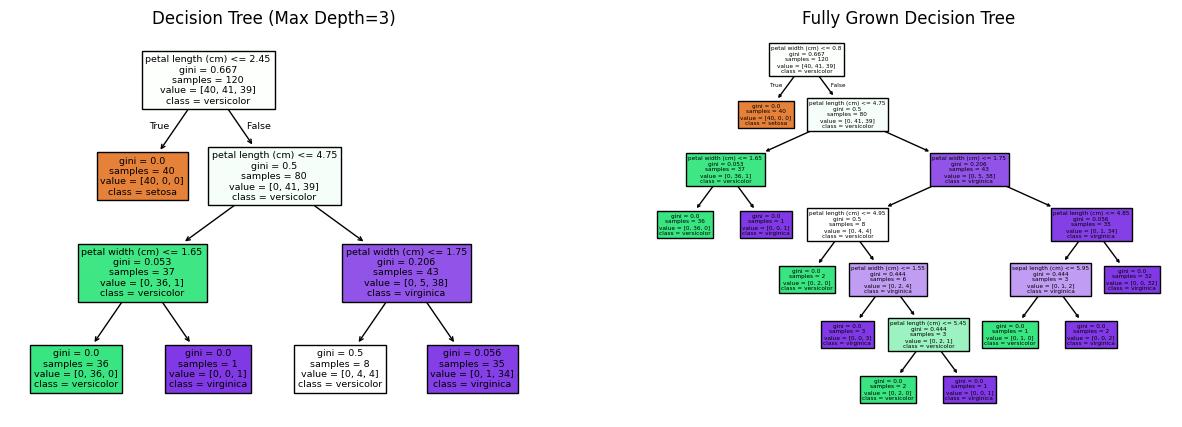

In [16]:
# 6. Compare max_depth=3 tree with a fully grown tree
# Reset dataset to Iris before training trees
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train a fully grown Decision Tree Classifier
dt_full = DecisionTreeClassifier()
dt_full.fit(X_train, y_train)
y_pred_full = dt_full.predict(X_test)

# Train a limited depth Decision Tree Classifier (max_depth=3)
dt_limited = DecisionTreeClassifier(max_depth=3)
dt_limited.fit(X_train, y_train)
y_pred_limited = dt_limited.predict(X_test)

# Compare accuracy
print("Max Depth 3 Accuracy:", accuracy_score(y_test, y_pred_limited))
print("Full Tree Accuracy:", accuracy_score(y_test, y_pred_full))

# Visualize both trees
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_tree(dt_limited, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (Max Depth=3)")

plt.subplot(1,2,2)
plot_tree(dt_full, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Fully Grown Decision Tree")

plt.show()



In [18]:
# 7. Train with min_samples_split=5 and compare accuracy
dt_split = DecisionTreeClassifier(min_samples_split=5)
dt_split.fit(X_train, y_train)
y_pred_split = dt_split.predict(X_test)
print("Min Samples Split=5 Accuracy:", accuracy_score(y_test, y_pred_split))

Min Samples Split=5 Accuracy: 1.0


In [19]:
# 8. Apply Feature Scaling before training a Decision Tree Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))

Scaled Accuracy: 1.0


In [20]:
# 9. Train using One-vs-Rest (OvR) Strategy
# (By default, Decision Trees handle multiclass classification natively)

In [21]:
# 10. Display Feature Importance Scores
print("Feature Importance Scores:", dt_clf.feature_importances_)

Feature Importance Scores: [0.         0.01667014 0.90614339 0.07718647]


In [26]:
# 11. Train a Decision Tree Regressor with max_depth=5 and compare

# Reload the housing dataset before training Decision Tree Regressor
housing = fetch_california_housing()
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor with max_depth=5
regressor_depth5 = DecisionTreeRegressor(max_depth=5)
regressor_depth5.fit(X_train_reg, y_train_reg)
y_pred_depth5 = regressor_depth5.predict(X_test_reg)

# Compare with the unrestricted tree trained earlier
print("MSE (Depth 5):", mean_squared_error(y_test_reg, y_pred_depth5))
print("MSE (Full Tree):", mean_squared_error(y_test_reg, y_pred_reg))


MSE (Depth 5): 0.5245146178314736
MSE (Full Tree): 0.5079809118160852


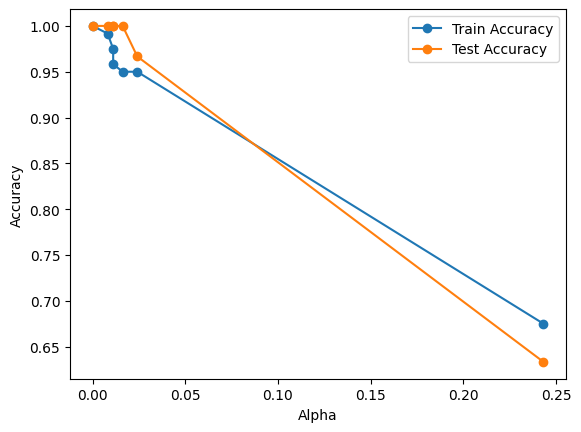

In [27]:
# 12. Apply Cost Complexity Pruning (CCP) and visualize its effect
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
train_scores, test_scores = [], []

for alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    dt_pruned.fit(X_train, y_train)
    train_scores.append(dt_pruned.score(X_train, y_train))
    test_scores.append(dt_pruned.score(X_test, y_test))

plt.figure()
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Precision: 1.0 Recall: 1.0 F1-Score: 1.0


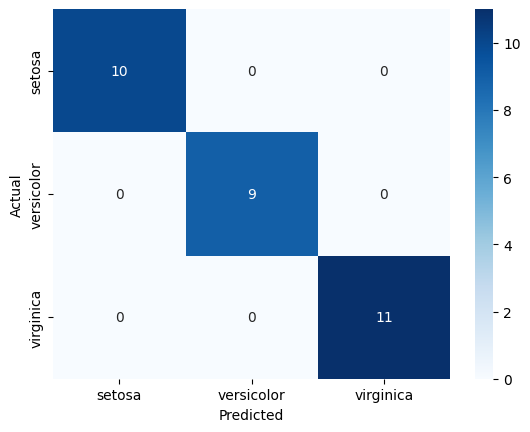

In [28]:
# 13. Evaluate Performance using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision:", precision, "Recall:", recall, "F1-Score:", f1)



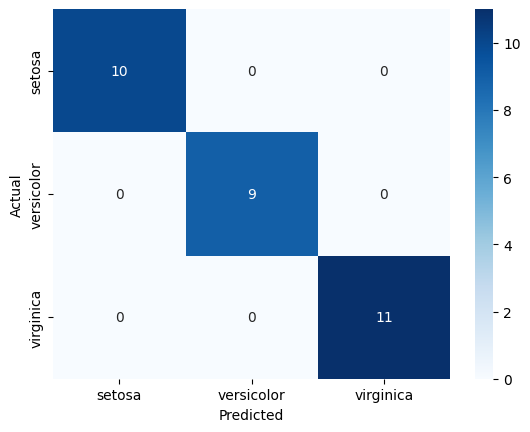

In [32]:
# 14. Visualize Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
# 15. Use GridSearchCV to optimize max_depth and min_samples_split
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
